In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("C:/Users/gupta/Python jypter notebook/Data/Programs.xlsx")

Check for Missing Values If there are missing values, decide how to handle them. You can fill missing values, remove rows/columns, or interpolate.

In [4]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Institution                        0
Minimum IELTS                     13
Minimum TOIEC                     72
Minimum TOEFL                     31
Minimum CFR                       65
GMAT/GRE Required                  2
Required Courses                  96
Admission Requirement              3
No. of Location                    0
Programmes/Streams Offered        39
International/Domestic            15
Application fee                    9
School Fees(National)             31
School Fees (International)        1
Currency                           0
Length of Programme(terms)         2
Months Per Term                    3
Core Courses                      14
Electives                         37
Co op/Internship: Required         2
Co op/Internship: Not Required     2
Co op/Internship: Optional         2
Thesis: Required                   2
Thesis: Not Required               3
Thesis: Optional                   3
Scholarships                       5
Gap Year             

 Standardize Text Data (if needed)
 If text data contains variations, consider standardizing it.


In [5]:
df['Institution'] = df['Institution'].str.strip()

Exploratory Data Analysis (EDA) is a crucial step in understanding your dataset and uncovering initial insights

Summary Statistics

In [6]:
# Summary statistics for numeric columns
numeric_summary = df.describe()
print("Summary Statistics for Numeric Columns:\n", numeric_summary)

# Frequency of categories for categorical columns
categorical_columns = ['International/Domestic']
for col in categorical_columns:
    print(f"Frequency of Categories for {col}:\n", df[col].value_counts())


Summary Statistics for Numeric Columns:
        Minimum TOIEC  Minimum TOEFL  No. of Location  \
count      28.000000      69.000000       100.000000   
mean      618.857143      89.623188         1.550000   
std       269.884573       9.693997         1.250252   
min        90.000000      60.000000         1.000000   
25%       573.750000      83.000000         1.000000   
50%       735.000000      90.000000         1.000000   
75%       792.500000     100.000000         1.000000   
max       945.000000     100.000000         7.000000   

       Programmes/Streams Offered  Length of Programme(terms)  \
count                   61.000000                   98.000000   
mean                     6.803279                    3.918367   
std                      4.146564                    0.959741   
min                      1.000000                    2.000000   
25%                      4.000000                    3.000000   
50%                      6.000000                    4.000000   

corelation analysis

C:\Users\gupta\AppData\Local\Temp\ipykernel_10048\1531176317.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


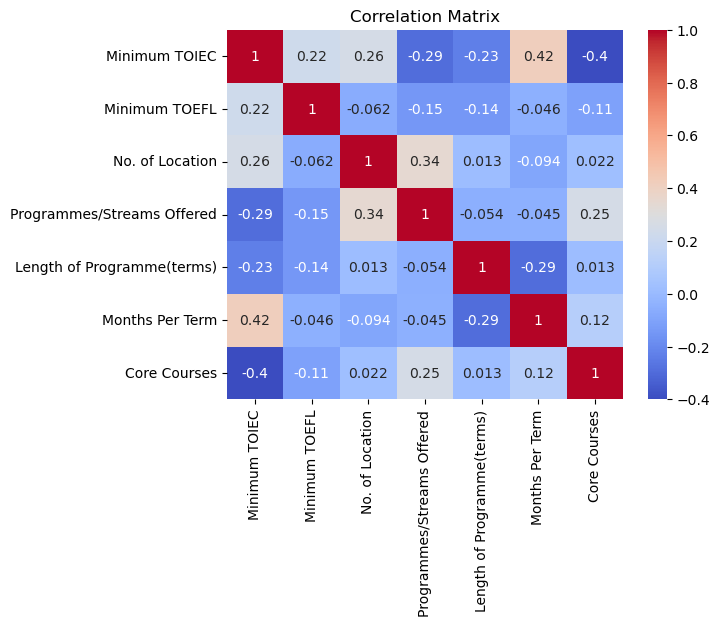

In [14]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Distribution of Categorical Variables

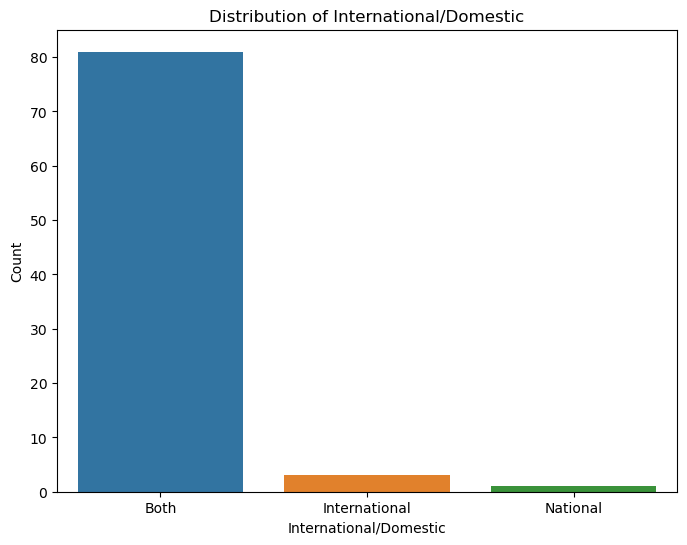

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='International/Domestic')
plt.xlabel('International/Domestic')
plt.ylabel('Count')
plt.title('Distribution of International/Domestic')
plt.show()

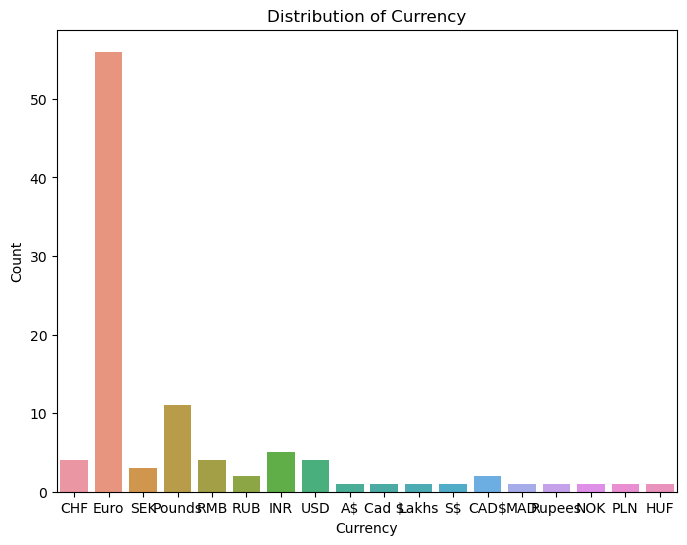

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Currency')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.title('Distribution of Currency')
plt.show()

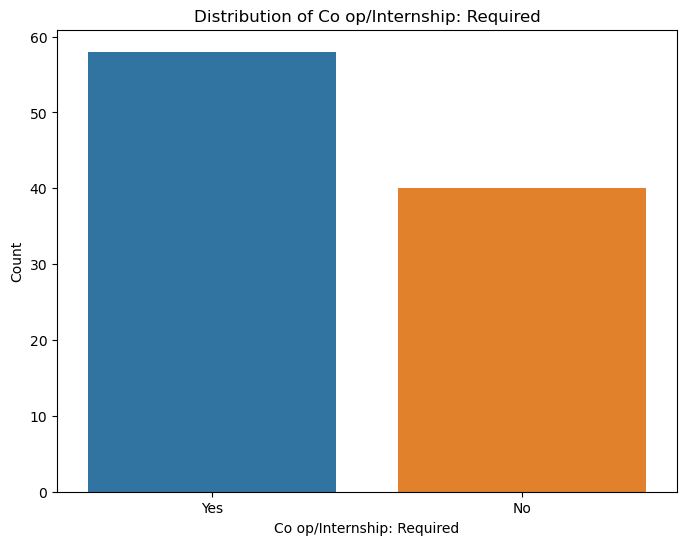

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Co op/Internship: Required')
plt.xlabel('Co op/Internship: Required')
plt.ylabel('Count')
plt.title('Distribution of Co op/Internship: Required')
plt.show()

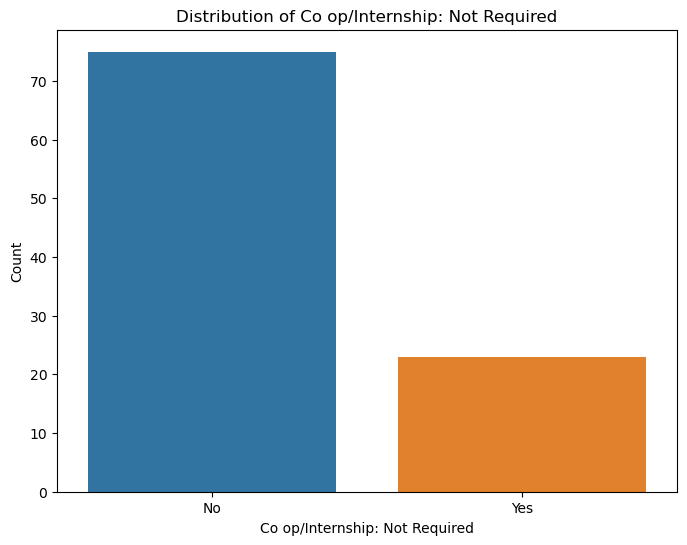

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Co op/Internship: Not Required')
plt.xlabel('Co op/Internship: Not Required')
plt.ylabel('Count')
plt.title('Distribution of Co op/Internship: Not Required')
plt.show()

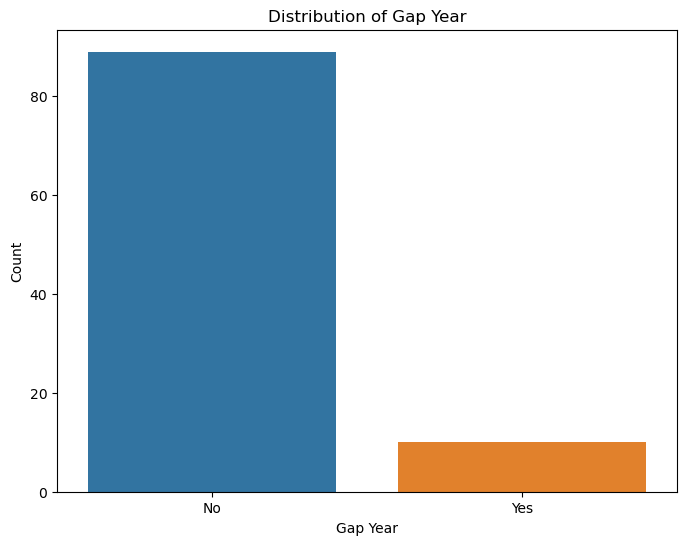

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gap Year')
plt.xlabel('Gap Year')
plt.ylabel('Count')
plt.title('Distribution of Gap Year')
plt.show()

Outlier Detection

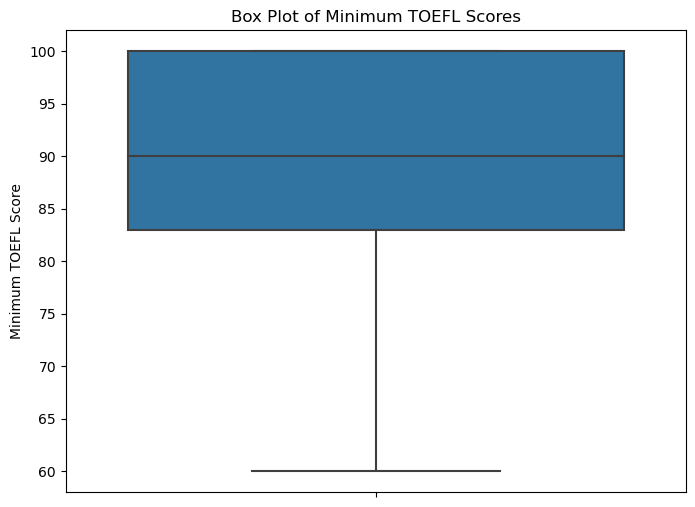

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Minimum TOEFL')
plt.ylabel('Minimum TOEFL Score')
plt.title('Box Plot of Minimum TOEFL Scores')
plt.show()

Text data exploration involves analyzing and understanding textual information in your dataset. In your case, you want to explore attributes like "Required Courses" and "Admission Requirement" for Master of Management programs.

Tokenization is the process of breaking text into individual words or tokens.

In [19]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Example: Tokenization of 'Required Courses' text
text = df['Required Courses'].iloc[0]  # Assuming 'Required Courses' is a column in your DataFrame
doc = nlp(text)
tokens = [token.text for token in doc]

print("Tokens:", tokens)

Tokens: ['Required', 'degree', 'in', 'a', 'similar', 'subject', 'with', 'atlease', ' ', '80', 'ECTS', 'credit', 'point']


Word Frequency Analysis

In [20]:
from collections import Counter

# Example: Word frequency analysis for 'Required Courses'
word_counter = Counter(tokens)
most_common_words = word_counter.most_common(10)  # Get the top 10 most common words
print("Most Common Words:", most_common_words)

Most Common Words: [('Required', 1), ('degree', 1), ('in', 1), ('a', 1), ('similar', 1), ('subject', 1), ('with', 1), ('atlease', 1), (' ', 1), ('80', 1)]


Create word clouds to visualize the most frequent words

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------------------------------- 151.4/151.4 kB 3.0 MB/s eta 0:00:00


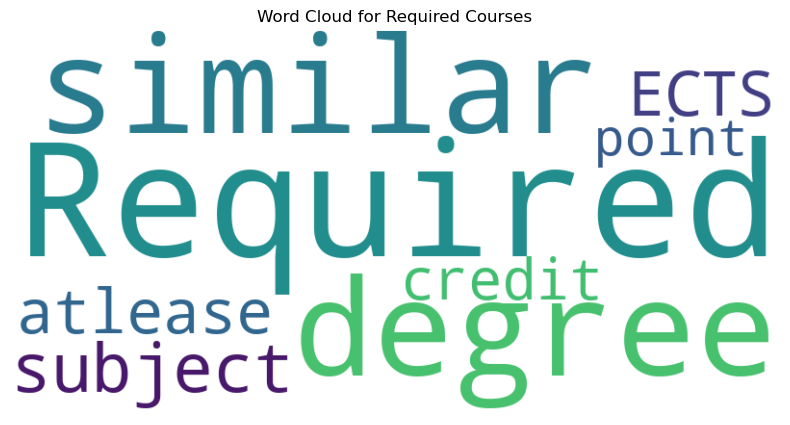

In [23]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example: Creating a word cloud for 'Required Courses'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Required Courses')
plt.show()


 Text length analysis for 'Required Courses'

In [24]:
text_lengths = [len(token) for token in tokens]
max_length = max(text_lengths)
min_length = min(text_lengths)
average_length = sum(text_lengths) / len(text_lengths)

print("Max Length:", max_length)
print("Min Length:", min_length)
print("Average Length:", average_length)

Max Length: 8
Min Length: 1
Average Length: 4.615384615384615


Sentiment Analysis

In [26]:
!pip install textblob

from textblob import TextBlob

# Example: Sentiment analysis for 'Required Courses'
text_blob = TextBlob(text)
sentiment_score = text_blob.sentiment.polarity  # Range: -1 (negative) to 1 (positive)
print("Sentiment Score:", sentiment_score)

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     --------------- ---------------------- 256.0/636.8 kB 5.2 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 6.7 MB/s eta 0:00:00
Sentiment Score: -0.08333333333333333
